# House prices - advanced regression techniques
## Predict sales prices and practice feature engineering, RFs, and gradient boost

This is my second project out of ten, on my path to learn, understand and apply machine learning. The objectives of this project are:

- Predicting the price of a house given its characteristics.

- "Hello World!" of regression problems.

Dataset from [https://www.kaggle.com/c/house-prices-advanced-regression-techniques/](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description)

In [ ]:
# Required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Load data
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
feature_exp = pd.read_csv('../data/feature_expectation.csv')

## Data exploration

First, I will make an excel where I have an extendend look to the characteristics of each feature with the next columns:

- Variable: Variable name.
- Type: categorical or numerical
- Segment: building, space or location
- Expectation: High, medium or low. How much I expect the feature will influence the target variable
- Conclusion: High, medium o low. After a quick look to the data, the importance of the feature
- Comments - Any general comments that occured to us.

In [ ]:
# Convert features name into rows in excel
data_columns = pd.DataFrame(data=np.array(train_data.columns).transpose())
data_columns.to_csv('../data/features.csv', index=False, header=True)

I will go feature by feature and fill the type, segment and expectation column. After that I will filter the high expectation features and make some scatter plot comparing them with the SalePrice.

In [ ]:


df_cat_feat = _deepnote_execute_sql("""SELECT "Variable"
FROM feature_exp
WHERE
    "Type" = 'categorical'  
    AND (
        "Expectation" = 'High' 
        OR "Expectation" = 'Medium'
    );
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_cat_feat

,Variable
0,MSZoning
1,Utilities
2,Neighborhood
3,OverallQual
4,OverallCond
5,MSSubClass
6,Street
7,LotShape
8,HouseStyle
9,Foundation


In [ ]:


df_num_feat = _deepnote_execute_sql("""SELECT "Variable"
FROM feature_exp
WHERE
    "Type" = 'numerical'  
    AND (
        "Expectation" = 'High' 
        OR "Expectation" = 'Medium'
    );
    
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_num_feat

,Variable
0,LotArea
1,YearBuilt
2,TotalBsmtSF
3,1stFlrSF
4,2ndFlrSF
5,BsmtFullBath
6,BsmtHalfBath
7,FullBath
8,HalfBath
9,BedroomAbvGr


In [ ]:
# Convert dataframes to np arrays
num_feat = df_num_feat.to_numpy().transpose()
num_feat = np.array(num_feat[0])

cat_feat = df_cat_feat.to_numpy().transpose()
cat_feat = np.array(cat_feat[0])


def scatter_price_num_feat(features):
    n_feat = len(features)
    rows = n_feat // 2 + n_feat % 2
    fig, axes = plt.subplots(rows, 2, figsize=(30, 40))
    column = 0
    for index, feat in enumerate(features):
        sns.scatterplot(
            ax=axes[column][index % 2], data=train_data, x=feat, y="SalePrice"
        )
        if index % 2 == 1:
            column += 1

def boxplot_price_cat_feat(features):
    n_feat = len(features)
    rows = n_feat // 2 + n_feat % 2
    fig, axes = plt.subplots(rows, 2, figsize=(40, 40))
    column = 0
    for index, feat in enumerate(features):
        sns.boxplot(
            ax=axes[column][index % 2], data=train_data, x=feat, y="SalePrice"
        )
        if index % 2 == 1:
            column += 1



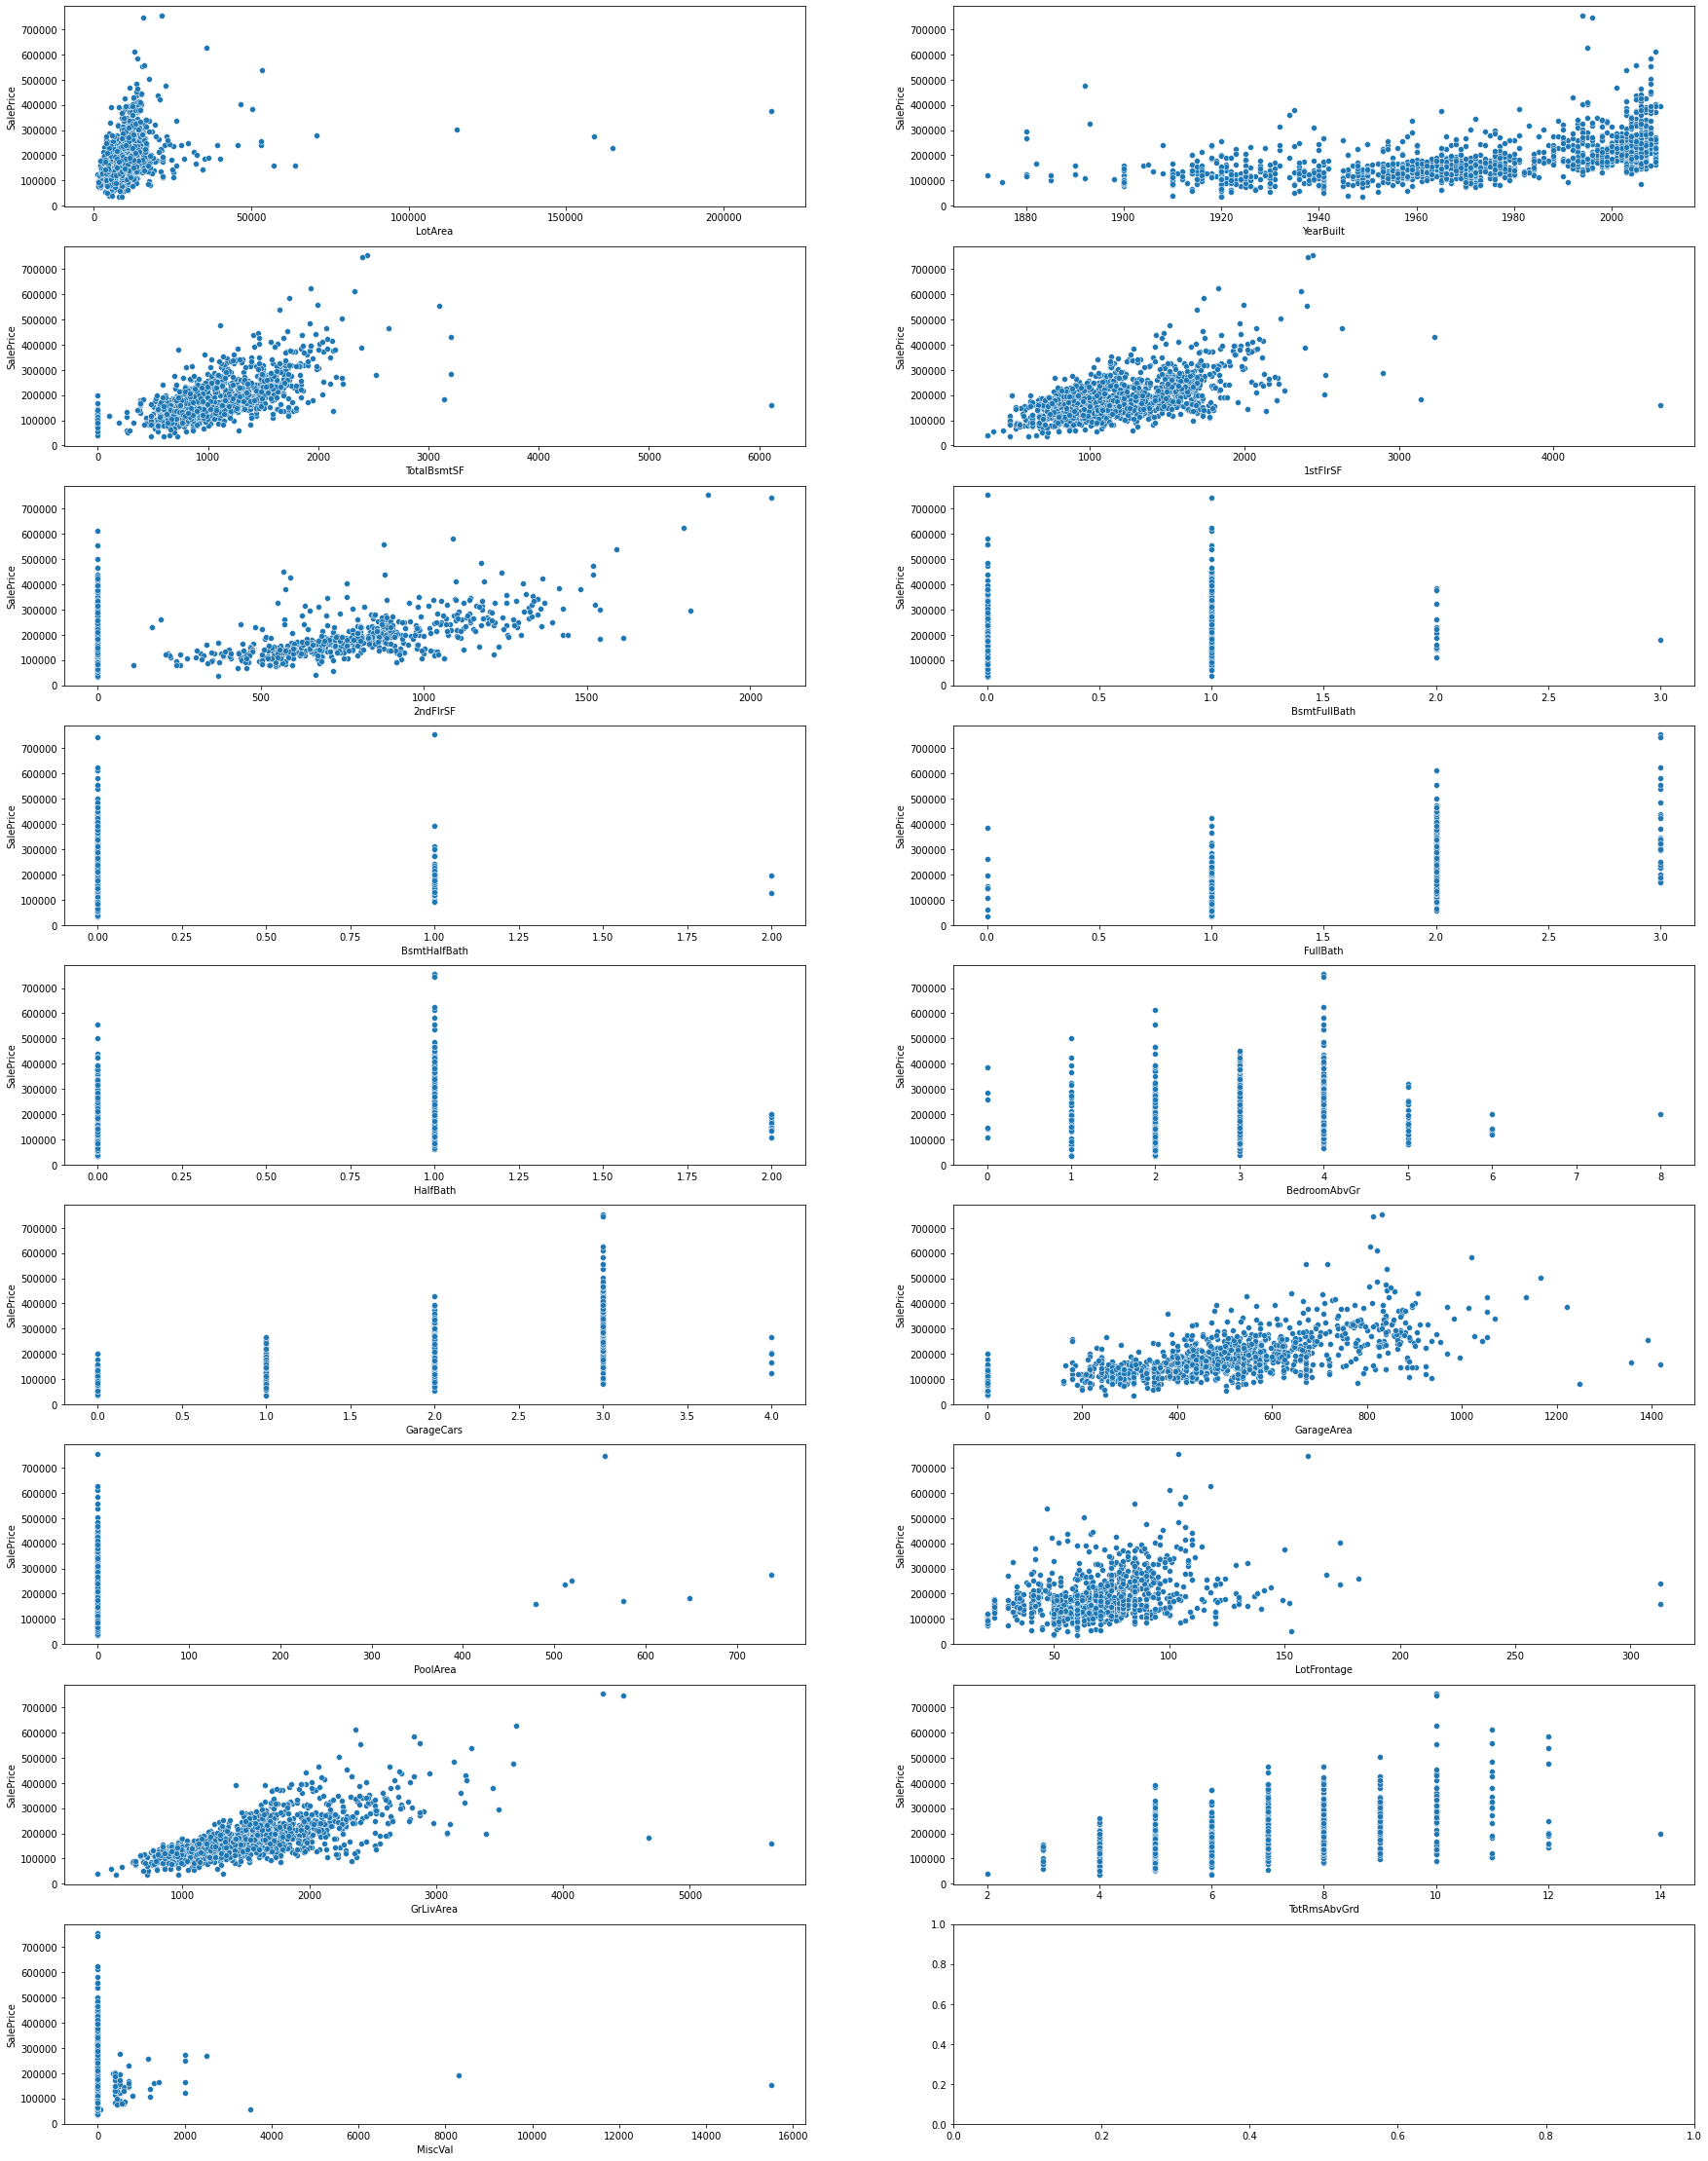

In [ ]:
# Plot all the numerical features
scatter_price_num_feat(num_feat)


After analyzing the numerical high & medium expectation features, I will remain with:

- LotFrontage -> Linear feet of street connected to property
- YearBuilt -> Original construction date
- TotalBsmtSF -> Total square feet of basement area
- GrLivArea -> Above grade (ground) living area square feet
- GarageArea -> Size of garage in square feet


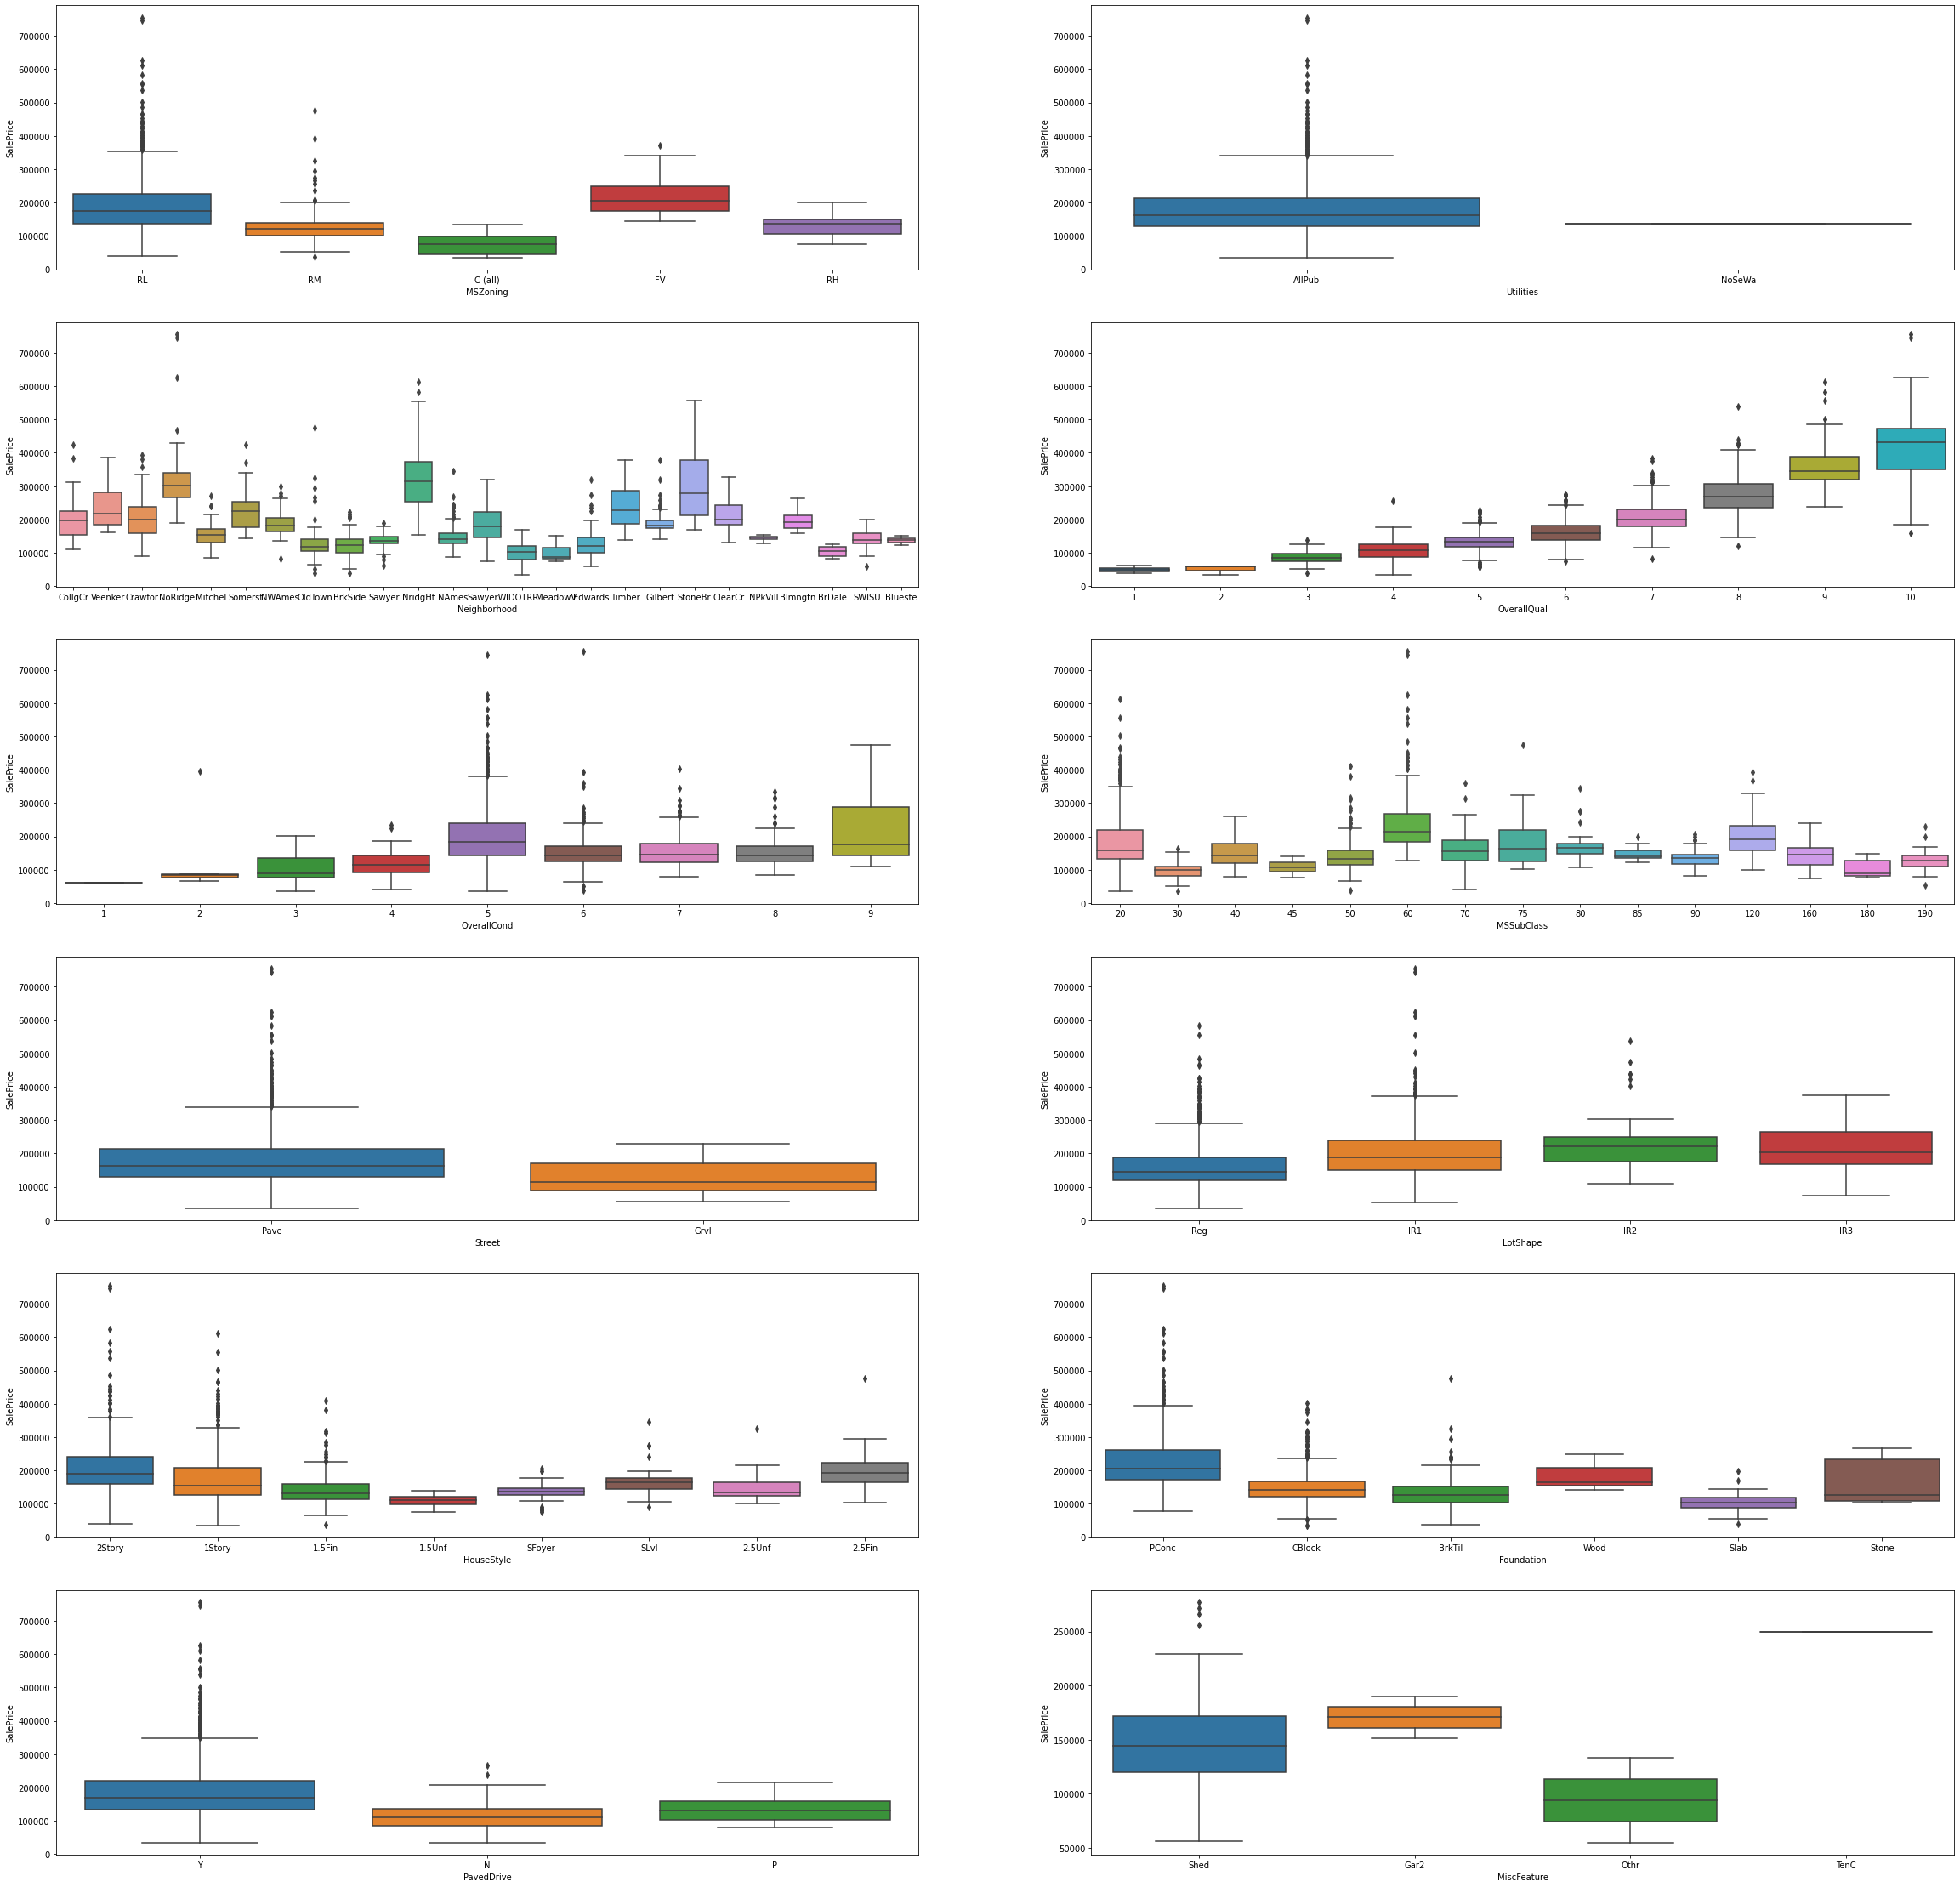

In [ ]:
# Plot all the categorical features
boxplot_price_cat_feat(cat_feat)

After analyzing the categorical high & medium expectation features, I will remain with:

- MSSubClass -> Identifies the type of dwelling involved in the sale.	
- Street -> Physical locations within Ames city limits
- Neighborhood -> Total square feet of basement area
- OverallQual -> Rates the overall material and finish of the house
- OverallCond -> Rates the overall condition of the house
- PavedDrive -> Paved driveway


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8011a514-0f89-418c-895a-f482743fdd89' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>